<a href="https://colab.research.google.com/github/andersonfs94/Identificador_Fake_News/blob/main/Machine_Learning_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Carregar os datasets de notícias verdadeiras e falsas
dados_true = pd.read_csv('/content/drive/MyDrive/Dataset/True.csv')
dados_fake = pd.read_csv('/content/drive/MyDrive/Dataset/Fake.csv')

In [39]:
# Descrever os dados para entender a distribuição
print(dados_true.describe())

                                                    title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182  


In [40]:
# Descrever os dados para entender a distribuição
print(dados_fake.describe())

                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46  


In [41]:
# Adicionar uma coluna de label aos datasets
dados_true['label'] = 'REAL'
dados_fake['label'] = 'FAKE'

# Concatenar os datasets em um único dataframe e embaralhar os dados
dados = pd.concat([dados_true, dados_fake]).sample(frac=1).reset_index().drop(columns=['index'])

In [42]:
# Verificar a forma do DataFrame
print(dados.shape)

(44898, 5)


In [43]:
# Visualizar as primeiras linhas do dataset unificado
print(dados.head())

                                               title  \
0  MUSLIM IMMIGRANT BEATS 22-Term MN Democrat…Tha...   
1  BILLIONAIRE, Leftist Author Of Harry Potter Bo...   
2  Hillary’s Secret Weapon: Evan McMullin is CIA-...   
3  Nigeria's Buhari to visit heartland of Biafra ...   
4  PRESIDENT TRUMP Makes Room Erupt in Laughter w...   

                                                text      subject  \
0  The number of Muslim registered voters is up 3...    left-news   
1  Big-mouth billionaire and leftist author of th...     politics   
2  J.R. Smith 21st Century WireMuch has been made...  Middle-east   
3  ABUJA (Reuters) - President Muhammadu Buhari i...    worldnews   
4  President Trump spoke at the State Banquet dur...     politics   

                 date label  
0        Aug 13, 2016  FAKE  
1         Aug 1, 2017  FAKE  
2    October 31, 2016  FAKE  
3  November 13, 2017   REAL  
4        Nov 11, 2017  FAKE  


In [44]:
# Separar as labels (rótulos)
rotulo = dados.label
print(rotulo.head())

0    FAKE
1    FAKE
2    FAKE
3    REAL
4    FAKE
Name: label, dtype: object


In [45]:
#Dividindo os dados em treino e teste. Sendo a variável x o texto dos dados e a variável y o rotulo com as informações de verdadeiro/falso.
#Como é um aprendizado supervisionado, é necessário ter a resposta nos dados.
x_train, x_test, y_train, y_test = train_test_split(dados['text'], rotulo, test_size=0.3, random_state=7)

# Passive Aggressive Classifier

In [46]:
# Converter os textos em uma matriz TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [47]:
# Treinar o modelo de classificação Passive Aggressive
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [48]:
# Fazer previsões no conjunto de teste
y_pred = pac.predict(tfidf_test)

# Calcular a acurácia do modelo
score = accuracy_score(y_test, y_pred)
print(f'Precisão do Passive Aggressive Classifier: {round(score*100,2)}%')

Precisão do Passive Aggressive Classifier: 99.3%


In [49]:
# Gerar a matriz de confusão
cf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cf_matrix)

[[7000   62]
 [  32 6376]]


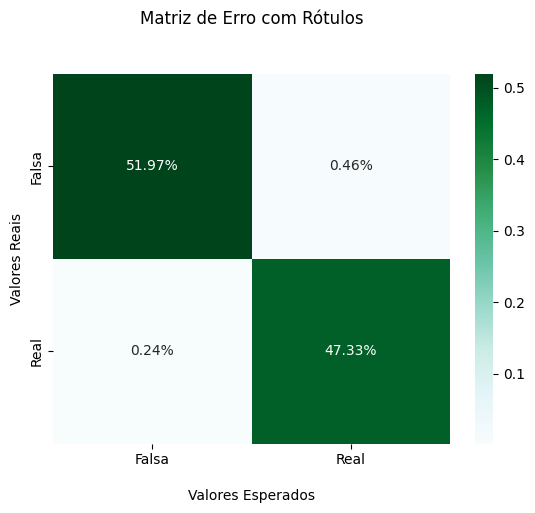

In [50]:
# Visualizar a matriz de confusão usando Seaborn
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='BuGn')
ax.set_title('Matriz de Erro com Rótulos\n\n')
ax.set_xlabel('\nValores Esperados')
ax.set_ylabel('Valores Reais')
ax.xaxis.set_ticklabels(['Falsa', 'Real'])
ax.yaxis.set_ticklabels(['Falsa', 'Real'])

plt.show()